# Project:-Heart-Failure Prediction

#### The aim of this project is to use the fournished data to predict which patients could die becuase of heart failure --- Using KNN ansd Logistic Regression

import data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Loading Dataset

In [8]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Dataset Description

* age - age 
* anaemia - Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
* diabetes - If the patient has diabetes (boolean)
* ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure - If the patient has hypertension (boolean)
* platelets - Platelets in the blood (kiloplatelets/mL)
* serum_creatinine - Level of serum creatinine in the blood (mg/dL)
* serum_sodium - Level of serum sodium in the blood (mEq/L)
* sex - Woman or man (binary) | Male = 1, Female = 0
* smoking - If the patient smokes or not (boolean)
* time - Follow-up period (days)
* DEATH_event - If the patient deceased during the follow-up period (boolean)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


missing vlaues

In [12]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Data-Visualizing

In [15]:
#sns.pairplot(df,hue='DEATH_EVENT')

In [24]:
df.corr()['DEATH_EVENT'].sort_values( ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

#### Age

Text(0.5, 1.0, 'Age VS Death Event')

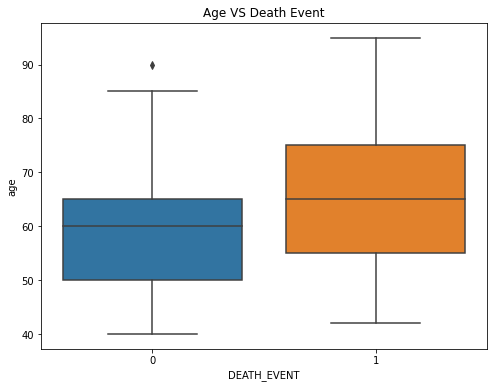

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT',y='age',data=df)
plt.title('Age VS Death Event')

#### serum_creatinine

Text(0.5, 1.0, 'serum_creatinine VS Death Event')

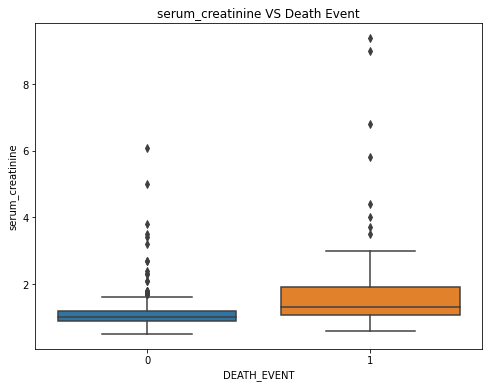

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=df)
plt.title('serum_creatinine VS Death Event')

#### High Blood Pressure distribustion

Text(0.5, 1.0, 'High blood pressure vs Death events')

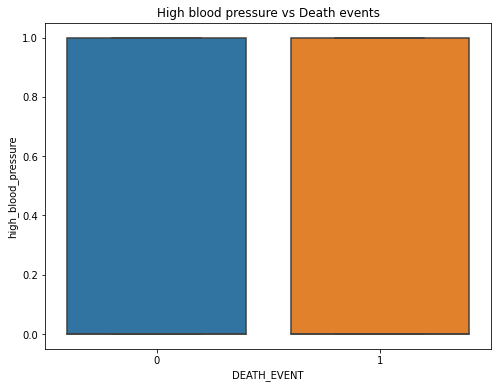

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(y='high_blood_pressure',x='DEATH_EVENT',data=df)
plt.title('High blood pressure vs Death events')

#### Creatinine Phosphokinase Distribution

Text(0.5, 1.0, 'Creatinine Phosphokinase vs death events')

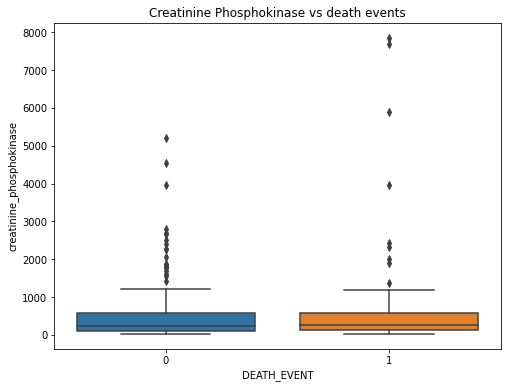

In [33]:

plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='DEATH_EVENT',y='creatinine_phosphokinase')
plt.title('Creatinine Phosphokinase vs death events')

#### Enjection Fraction Distribution

Text(0.5, 1.0, 'Ejection Fraction vs death events')

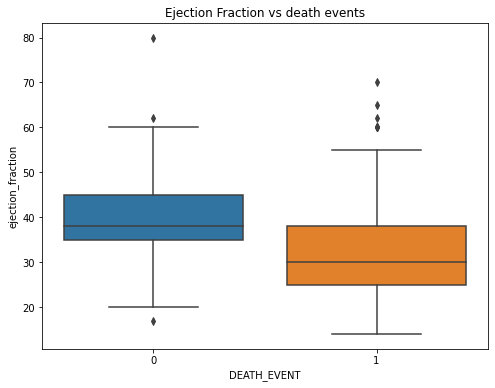

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='DEATH_EVENT',y='ejection_fraction')
plt.title('Ejection Fraction vs death events')

#### Serum  Creatinine Distribution

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

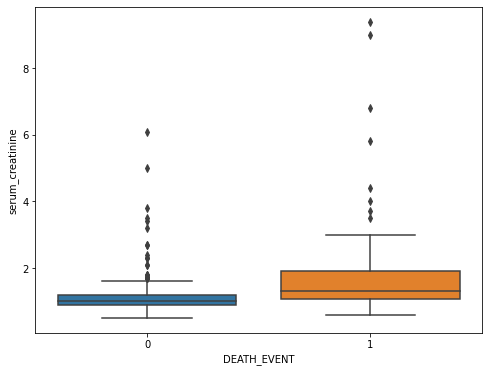

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=df)

#### correlation plot

In [37]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#### Correlation Heatmap

<AxesSubplot:>

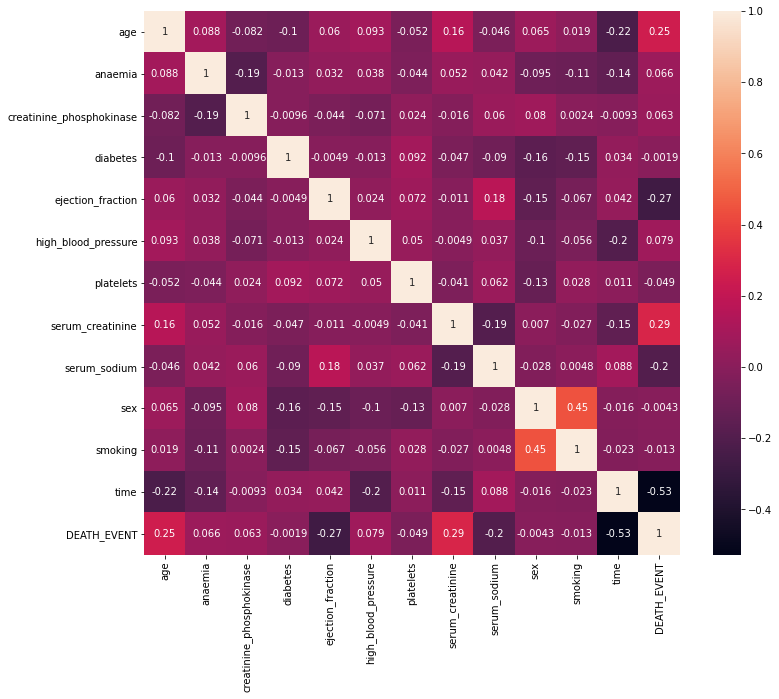

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)


#### death events according to Age

In [61]:
age=df.groupby('age').count()['DEATH_EVENT'].sort_values(ascending=False).reset_index()


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

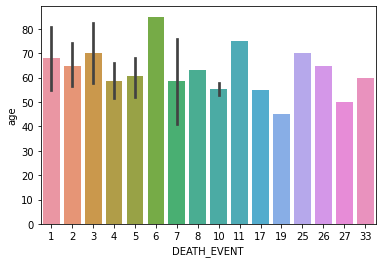

In [60]:
sns.barplot(x='DEATH_EVENT',y='age',data=age.sort_values('age',ascending=False))

<AxesSubplot:xlabel='age'>

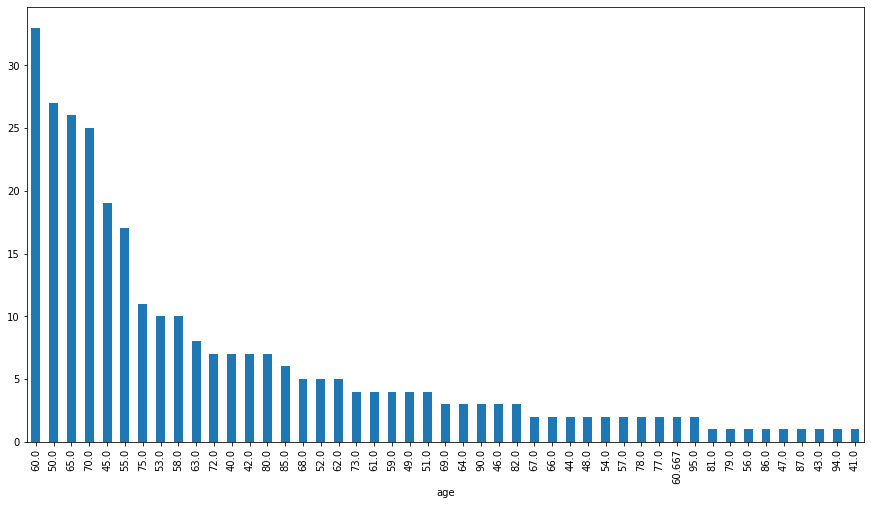

In [64]:
plt.figure(figsize=(15,8))
df.groupby('age').count()['DEATH_EVENT'].sort_values(ascending=False).plot(kind='bar')

#### correlation features of Death Events

<AxesSubplot:>

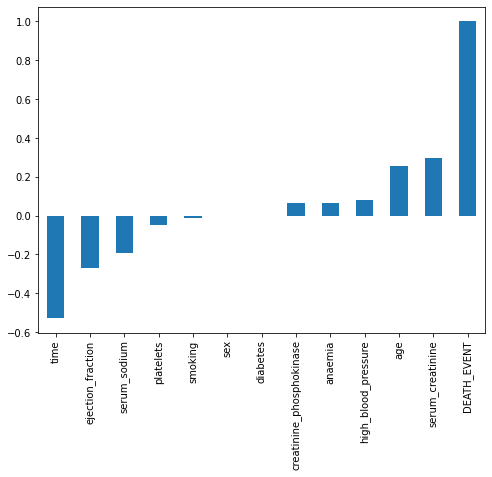

In [68]:
plt.figure(figsize=(8,6))
df.corr()['DEATH_EVENT'].sort_values().plot(kind='bar')

### Feature Selectio | Filtering

In [72]:
print(df[['age','ejection_fraction','serum_creatinine','time']].corr())

                        age  ejection_fraction  serum_creatinine      time
age                1.000000           0.060098          0.159187 -0.224068
ejection_fraction  0.060098           1.000000         -0.011302  0.041729
serum_creatinine   0.159187          -0.011302          1.000000 -0.149315
time              -0.224068           0.041729         -0.149315  1.000000


In [73]:
data=df[['age','ejection_fraction','serum_creatinine','time']]

### Normalizing the Date

In [100]:
Target=df['DEATH_EVENT']

In [101]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(data)
#dfScaled['DEATH_EVENT']=Target


c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [102]:
dfScaled = pd.DataFrame(data=x,columns=data.columns)

In [104]:
dfScaled['DEATH_EVENT']=Target
dfScaled

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,1.192945,-1.530560,0.490057,-1.629502,1
1,-0.491279,-0.007077,-0.284552,-1.603691,1
2,0.350833,-1.530560,-0.090900,-1.590785,1
3,-0.912335,-1.530560,0.490057,-1.590785,1
4,0.350833,-1.530560,1.264666,-1.577879,1
...,...,...,...,...,...
294,0.098199,-0.007077,-0.284552,1.803451,0
295,-0.491279,-0.007077,-0.187726,1.816357,0
296,-1.333392,1.854958,-0.575031,1.906697,0
297,-1.333392,-0.007077,0.005926,1.932509,0


### Train Test Split

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [106]:
lr=LogisticRegression()
X=dfScaled.drop(columns=['DEATH_EVENT'])
y=dfScaled['DEATH_EVENT']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

### Machine learning models

#### Logistic Regrssion

In [114]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr=LogisticRegression()

In [121]:
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Model Evaluations

In [124]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [127]:
print("Confusion Matrix:",confusion_matrix(predictions,y_test),'\n')
print('Classification Report:',classification_report(predictions,y_test))

Confusion Matrix: [[47  8]
 [ 4 16]] 

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.85      0.89        55
           1       0.67      0.80      0.73        20

   micro avg       0.84      0.84      0.84        75
   macro avg       0.79      0.83      0.81        75
weighted avg       0.85      0.84      0.84        75



#### KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn=KNeighborsClassifier(n_neighbors=5)

In [130]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [134]:
predictions_knn=knn.predict(X_test)

In [137]:
print(classification_report(predictions_knn,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.71      0.81      0.76        21

   micro avg       0.85      0.85      0.85        75
   macro avg       0.81      0.84      0.83        75
weighted avg       0.86      0.85      0.86        75



choosing K value

In [138]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

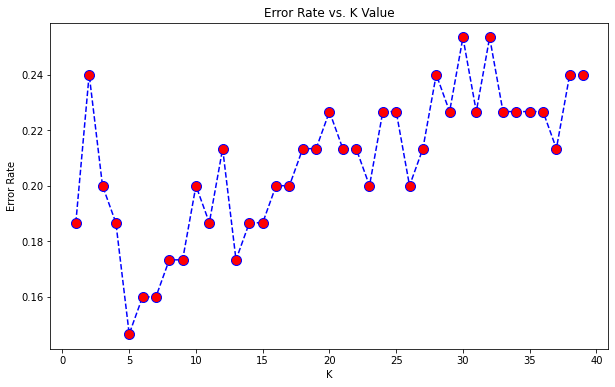

In [139]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [140]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
predictions_knn=knn.predict(X_test)


In [142]:
print(classification_report(predictions_knn,y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89        55
           1       0.67      0.80      0.73        20

   micro avg       0.84      0.84      0.84        75
   macro avg       0.79      0.83      0.81        75
weighted avg       0.85      0.84      0.84        75

